In [19]:
import torch
import os
import copy

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

torch.cuda.set_device(3)


In [ ]:
path = '/data/new_disk2/wangla/tmp/NCVV/logs/NHR/xzq_white_frames'

frame_length=2
big_datas = []
masks=[]
for frame_id in range(frame_length):
    print('process frame', frame_id)
    ckpt_path = os.path.join(path, 'fine_last_%d.tar' % frame_id)
    ckpt = torch.load(ckpt_path)
    model_states = ckpt['model_state_dict']

    density = model_states['density'].cpu() # torch.Size([1, 1, 130, 286, 109])
    feature = model_states['k0.k0'].cpu() # torch.Size([1, 12, 130, 286, 109])

    print(density.size())
    print(feature.size())

    cnt_mask = torch.nn.functional.softplus(density - 4.1) > 0.4 # minye的经验值，之后的数据可能需要细调？？？
    masks.append(cnt_mask)

    big_data = torch.cat([density, feature], dim=1)
    big_datas.append(big_data)


big_data = torch.cat(big_datas)
residual=(big_data[1:]-big_data[:-1])

value=torch.linalg.vector_norm(residual,dim=1)
value=value.reshape((value.size(0),-1))

print('value', value.size())

masks=torch.cat(masks)
masks=masks[1:] + masks[:-1]
masks=masks.reshape((masks.size(0),-1))


x = torch.linspace(0, big_data.size(2), steps=big_data.size(2))
y = torch.linspace(0, big_data.size(3), steps=big_data.size(3))
z = torch.linspace(0, big_data.size(4), steps=big_data.size(4))
grid_x, grid_y, grid_z = torch.meshgrid(x, y, z)
xyz = torch.stack([grid_x, grid_y, grid_z], dim=-1)  # (L,L,L,3)

xyz = xyz.reshape((-1, 3))  # (L*L*L,3)




Visualize

In [ ]:
for frameid in range(frame_length-1):
    fig=plt.figure()

    ax=plt.axes(projection='3d')
    v=value[frameid]
    c=v[masks[frameid]].cpu().numpy()
    xyz_c=xyz[masks[frameid]].cpu().numpy()
    
    ax.scatter(xyz_c[:,0],xyz_c[:,1],xyz_c[:,2],c=c)

    plt.show()

process frame 0
torch.Size([1, 1, 130, 286, 109])
torch.Size([1, 12, 130, 286, 109])
process frame 1
torch.Size([1, 1, 130, 286, 109])
torch.Size([1, 12, 130, 286, 109])
value torch.Size([1, 4052620])


Visualize

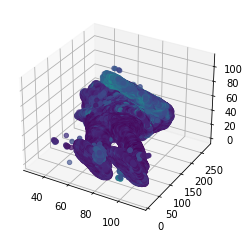

In [22]:
for frameid in range(frame_length-1):
    fig=plt.figure()

    ax=plt.axes(projection='3d')
    v=value[frameid]
    c=v[masks[frameid]].cpu().numpy()
    xyz_c=xyz[masks[frameid]].cpu().numpy()
    
    ax.scatter(xyz_c[:,0],xyz_c[:,1],xyz_c[:,2],c=c)

    plt.show()